In [1]:
import IPython, numpy as np, scipy as sp, matplotlib.pyplot as plt, matplotlib, sklearn, librosa
from IPython.display import Audio
import os, os.path
%matplotlib inline
# from sklearn.preprocessing import MultiLabelBinarizer
import cPickle
# import matplotlib.pyplot as plt
# from pybrain.tools.shortcuts import buildNetwork as bN

C:\Users\Ben\Anaconda\envs\eecs352\lib\site-packages\librosa\core\audio.py:37: UserWarning: Could not import scikits.samplerate. Falling back to scipy.signal
  warnings.warn('Could not import scikits.samplerate. '


In [2]:
librosa_loader = librosa.load

In [ ]:
#### TESTING MASS LOADING OF SOUND FILES ####

# directory_names = ['Screams','Bangs and other manmade sounds','Singing','Birds']
# screams,singing,birds,bangs = [],[],[],[]
# my_sounds = {"Screams":screams,"Singing":singing,"Birds":birds,"Bangs and other manmade sounds":bangs}
# print(my_sounds)
# # bangs.append(234523)
# # my_sounds["Screams"].append("plants")
# print(my_sounds)
# for key in my_sounds:
#     print(key in os.listdir("."))

In [ ]:
######## UNCOMMENT AND RUN THIS CELL IFF YOU NEED TO LOAD MORE SOUNDS ########

# for folder in directory_names:
#     for sound_file in os.listdir(folder):
#         print("folder: ",folder," sound_file: ",sound_file)
#         sound,sr = (librosa_loader((folder+'/'+sound_file)))
#         my_sounds[folder].append((sound,sr))

In [ ]:
#### saves (pickles) the dictionary of sounds so we don't have to let our computer run overnight to reload sounds
# my_sounds = cPickle.load(open("my_sounds.pkl",'r'))

In [3]:
# Load the the sound dictionary and make sure it's working
# THIS CELL MUST BE RUN IN ORDER TO DO ANY OF THE OTHER STUFF IN THIS NOTEBOOK

my_sounds = cPickle.load(open("../my_sounds.pkl","r"))
Audio(my_sounds["Screams"][0][0],rate=my_sounds["Screams"][0][1])

In [ ]:
# Next several cells are for testing different analysis methods
MFCC = librosa.feature.mfcc(y=my_sounds['Singing'][0][0], sr=my_sounds['Singing'][0][1])

In [ ]:
librosa.display.specshow(MFCC,x_axis='time')

In [ ]:
CHROMA0 = librosa.feature.chromagram(y=my_sounds['Singing'][0][0], sr=my_sounds['Singing'][0][1])
CHROMA1 = librosa.feature.chroma_stft(y=my_sounds['Singing'][0][0], sr=my_sounds['Singing'][0][1])

In [ ]:
librosa.display.specshow(CHROMA0,x_axis='time')

In [ ]:
librosa.display.specshow(CHROMA0,x_axis='time')

In [ ]:
ScreamsCHROMA0 = librosa.feature.chromagram(y=my_sounds['Screams'][0][0], sr=my_sounds['Screams'][0][1])

In [ ]:
librosa.display.specshow(ScreamsCHROMA0,x_axis='time')

AttributeError: 'numpy.ndarray' object has no attribute 'show'

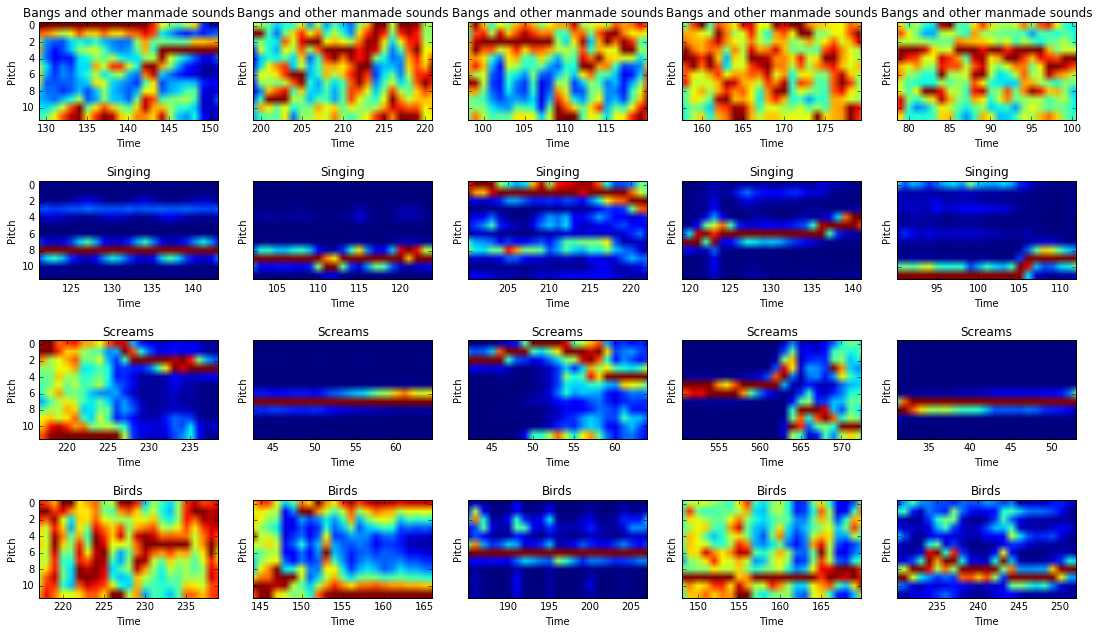

In [5]:
# Creates a 4x5 table of plots to show what chromagrams look like for different sound types

# subplot(nrows, ncols, plot_number)

# plt.figure()
# plt.figure(figsize=(18,6))
j = 0
num_plots = 5
fig,axes = plt.subplots(nrows=len(my_sounds),ncols=num_plots,sharey=True)
plt.subplots_adjust(left=0,right=2.4,top=2,bottom=0,hspace=0.62)
axes = axes.flatten()
# print(axes) # axes is an array of dim 4x5
for key in my_sounds: # get type of sound
    i = 1
    for index in np.random.choice(len(my_sounds[key]),size=num_plots,replace=False): # randomly select some from each
#         my_sounds[key][index][0]
        my_chroma = librosa.feature.chromagram(y=my_sounds[key][index][0], sr=my_sounds[key][index][1])
#         plt.subplot(len(my_sounds),num_plots,j)
#         plt.subplot.size(5,1)
#         plt.title(key)
#         plt.xlabel("Time")
#         plt.ylabel("Freq")
#         plt.imshow(my_chroma)
        axes[j].set_title(key)
        axes[j].set_xlabel("Time")
        axes[j].set_ylabel("Pitch")
        axes[j].imshow(my_chroma)
        i += 1
        j += 1
        
axes.show()

AttributeError: 'numpy.ndarray' object has no attribute 'show'

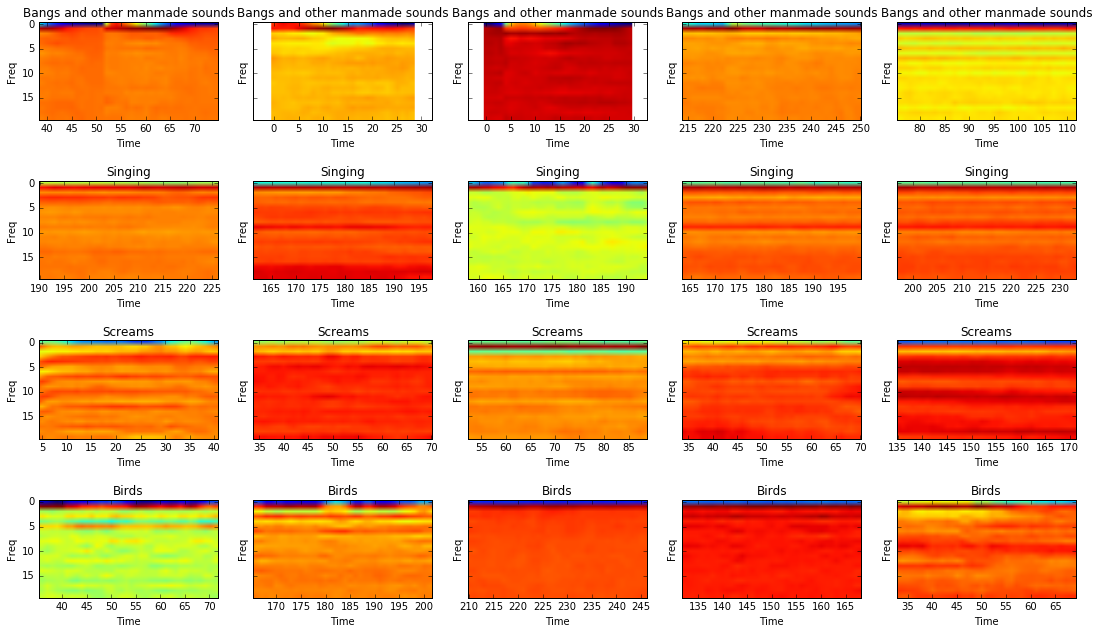

In [6]:
# Creates a 4x5 table of plots to show what MFCCs look like for different sound types

j = 0
num_plots = 5
fig,axes = plt.subplots(nrows=len(my_sounds),ncols=num_plots,sharey=True)
plt.subplots_adjust(left=0,right=2.4,top=2,bottom=0,hspace=0.62)
axes = axes.flatten()
# print(axes) # axes is an array of dim 4x5
for key in my_sounds: # get type of sound
    i = 1
    for index in np.random.choice(len(my_sounds[key]),size=num_plots,replace=False): # randomly select some from each
#         my_sounds[key][index][0]
        my_mfcc = librosa.feature.mfcc(y=my_sounds[key][index][0], sr=my_sounds[key][index][1])
#         plt.subplot(len(my_sounds),num_plots,j)
#         plt.subplot.size(5,1)
#         plt.title(key)
#         plt.xlabel("Time")
#         plt.ylabel("Freq")
#         plt.imshow(my_chroma)
        axes[j].set_title(key)
        axes[j].set_xlabel("Time")
        axes[j].set_ylabel("Freq")
        axes[j].imshow(my_mfcc)
        i += 1
        j += 1
        
axes.show()

In [ ]:
x = (librosa.feature.rmse(my_sounds["Singing"][0][0]))
x = x.flatten()
diffs = [x[i]-x[i-1] for i in xrange(1,len(x))]
plt.plot(diffs)

# print(np.shape(x))
# print(len(x.flatten()),len(range(len(x.flatten()))))
# plt.plot(range(len(x.flatten())),x.flatten())

AttributeError: 'numpy.ndarray' object has no attribute 'show'

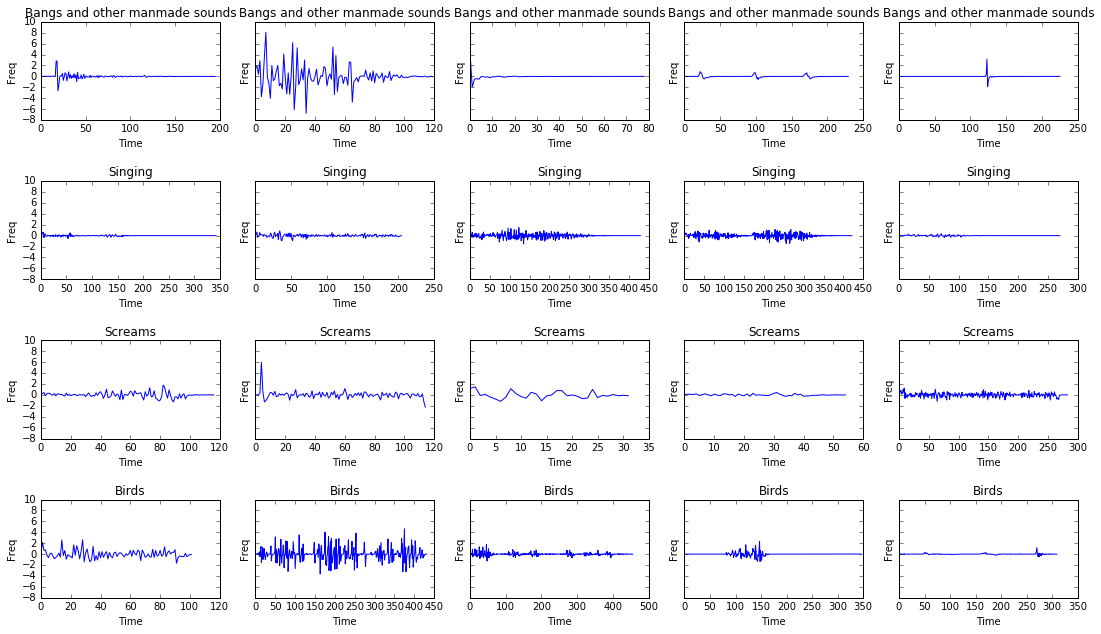

In [7]:
# Creates a 4x5 table of plots to show what attack (rapidity of sound onset) look like for different sound types
# Simplistic implementation

window_size = 1024
hop_size = window_size / 2
j = 0
num_plots = 5
fig,axes = plt.subplots(nrows=len(my_sounds),ncols=num_plots,sharey=True)
plt.subplots_adjust(left=0,right=2.4,top=2,bottom=0,hspace=0.62)
axes = axes.flatten()
# print(axes) # axes is an array of dim 4x5
for key in my_sounds: # get type of sound
    i = 1
    for index in np.random.choice(len(my_sounds[key]),size=num_plots,replace=False): # randomly select some from each
#         my_sounds[key][index][0]
        pre_attack = librosa.feature.rmse(y=my_sounds[key][index][0],n_fft=window_size,hop_length=hop_size)
        pre_attack = pre_attack.flatten()
        my_attack = [pre_attack[i]-pre_attack[i-1] for i in xrange(1,len(pre_attack))]
#         plt.subplot(len(my_sounds),num_plots,j)
#         plt.subplot.size(5,1)
#         plt.title(key)
#         plt.xlabel("Time")
#         plt.ylabel("Freq")
#         plt.imshow(my_chroma)
        axes[j].set_title(key)
        axes[j].set_xlabel("Time")
        axes[j].set_ylabel("Freq")
        axes[j].plot(my_attack)
        i += 1
        j += 1
        
axes.show()

AttributeError: 'numpy.ndarray' object has no attribute 'show'

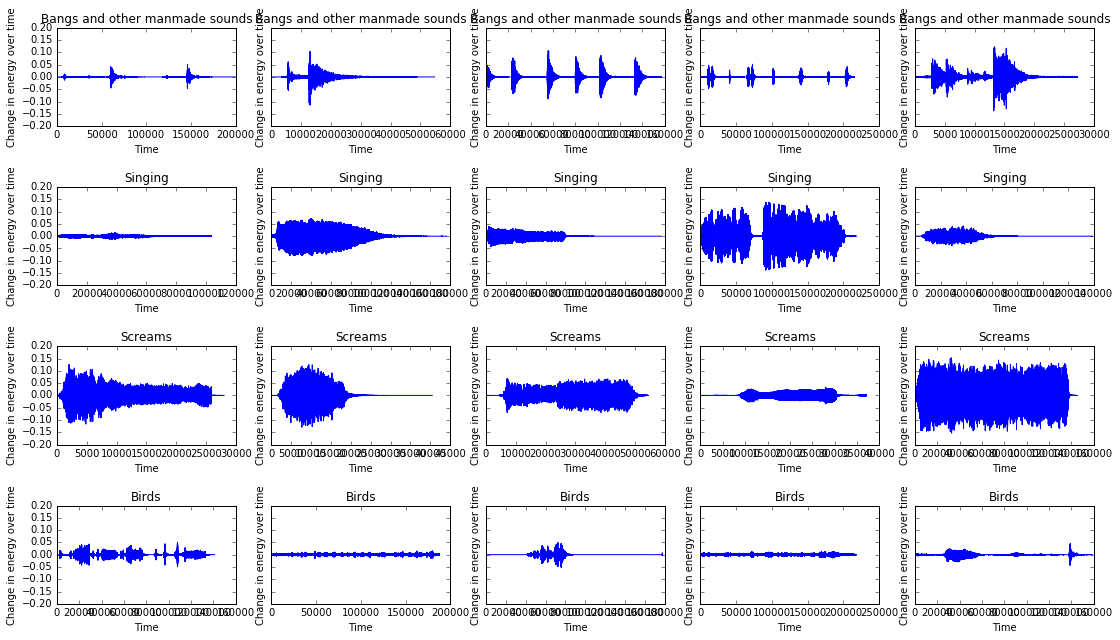

In [8]:
# Creates a 4x5 table of plots to show what attack (rapidity of sound onset) look like for different sound types
# Alternative attempt using librosa's built-in delta function

j = 0
num_plots = 5
fig,axes = plt.subplots(nrows=len(my_sounds),ncols=num_plots,sharey=True)
plt.subplots_adjust(left=0,right=2.4,top=2,bottom=0,hspace=0.62)
axes = axes.flatten()
# print(axes) # axes is an array of dim 4x5
for key in my_sounds: # get type of sound
    i = 1
    for index in np.random.choice(len(my_sounds[key]),size=num_plots,replace=False): # randomly select some from each
#         my_sounds[key][index][0]
        my_attack = librosa.feature.delta(my_sounds[key][index][0])
#         plt.subplot(len(my_sounds),num_plots,j)
#         plt.subplot.size(5,1)
#         plt.title(key)
#         plt.xlabel("Time")
#         plt.ylabel("Freq")
#         plt.imshow(my_chroma)
        axes[j].set_title(key)
        axes[j].set_xlabel("Time")
        axes[j].set_ylabel("Change in energy over time")
        axes[j].plot(my_attack)
        i += 1
        j += 1
        
axes.show()

AttributeError: 'numpy.ndarray' object has no attribute 'show'

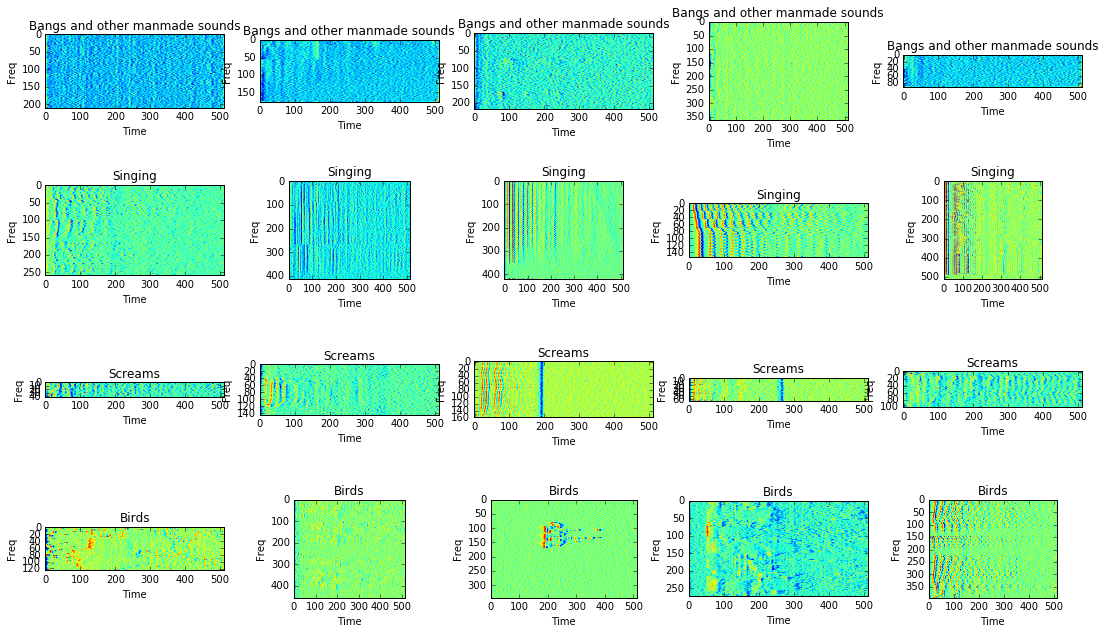

In [9]:
# Creates a 4x5 table of plots to show what attack (rapidity of sound onset) look like for different sound types
# Attempt using spectrograms as input to librosa's delta function

window_size = 1024
hop_size = window_size / 2
j = 0
num_plots = 5
fig,axes = plt.subplots(nrows=len(my_sounds),ncols=num_plots)#,sharey=True)
plt.subplots_adjust(left=0,right=2.4,top=2,bottom=0,hspace=0.62)
axes = axes.flatten()
# print(axes) # axes is an array of dim 4x5
for key in my_sounds: # get type of sound
    i = 1
    for index in np.random.choice(len(my_sounds[key]),size=num_plots,replace=False): # randomly select some from each
        sgram,times,freqs = spectrogram(my_sounds[key][index][0],window_size,hop_size,my_sounds[key][index][1],display=False)
        delta_sgram = librosa.feature.delta(sgram)
        axes[j].set_title(key)
        axes[j].set_xlabel("Time")
        axes[j].set_ylabel("Freq")
        axes[j].imshow(delta_sgram)
        i += 1
        j += 1
        
axes.show()

AttributeError: 'numpy.ndarray' object has no attribute 'show'

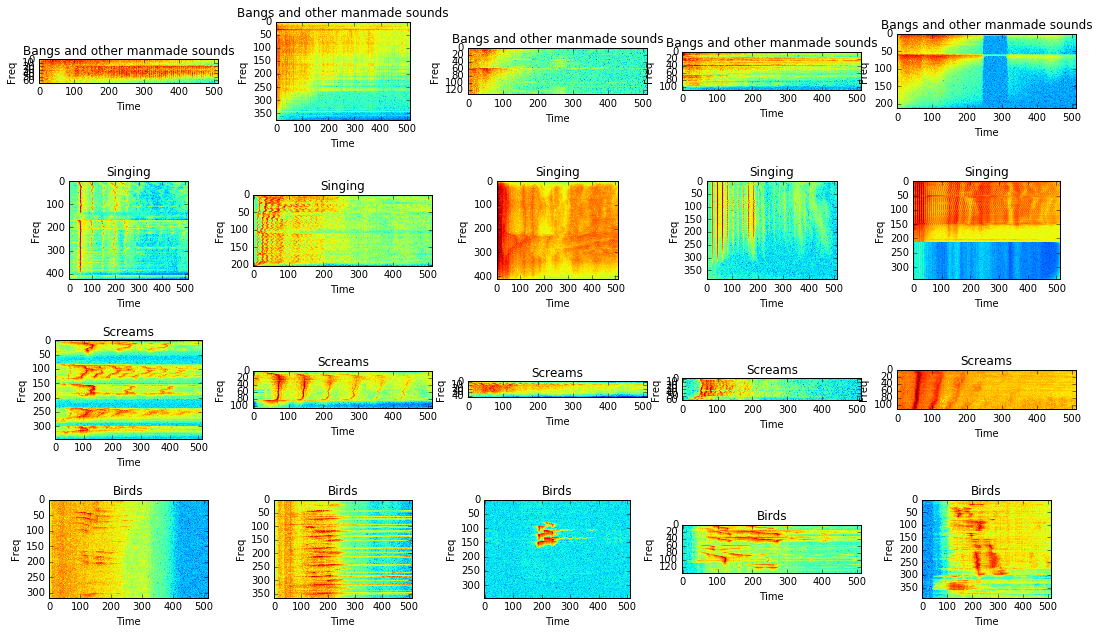

In [10]:
# Creates a 4x5 table of plots to show what spectrograms look like for different sound types

window_size = 1024
hop_size = window_size / 2
j = 0
num_plots = 5
fig,axes = plt.subplots(nrows=len(my_sounds),ncols=num_plots)#,sharey=True)
plt.subplots_adjust(left=0,right=2.4,top=2,bottom=0,hspace=0.62)
axes = axes.flatten()
for key in my_sounds: # get type of sound
    i = 1
    for index in np.random.choice(len(my_sounds[key]),size=num_plots,replace=False): # randomly select some from each
        sgram,times,freqs = spectrogram(my_sounds[key][index][0],window_size,hop_size,my_sounds[key][index][1],display=False)
        axes[j].set_title(key)
        axes[j].set_xlabel("Time")
        axes[j].set_ylabel("Freq")
        axes[j].imshow(sgram)
        i += 1
        j += 1
        
axes.show()

C:\Users\Ben\Anaconda\envs\eecs352\lib\site-packages\librosa\core\pitch.py:147: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


AttributeError: 'numpy.ndarray' object has no attribute 'show'

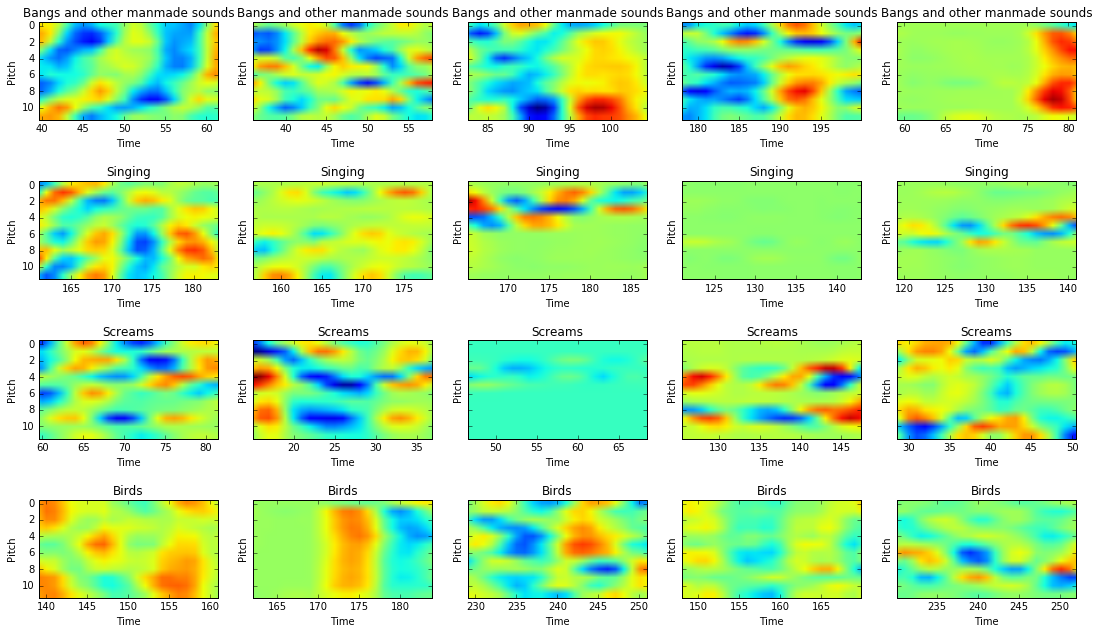

In [11]:
# Creates a 4x5 table of plots to show what (possibly the RATE of) change in chromagrams look like for different sound types

j = 0
num_plots = 5
fig,axes = plt.subplots(nrows=len(my_sounds),ncols=num_plots,sharey=True)
plt.subplots_adjust(left=0,right=2.4,top=2,bottom=0,hspace=0.62)
axes = axes.flatten()
for key in my_sounds: # get type of sound
    i = 1
    for index in np.random.choice(len(my_sounds[key]),size=num_plots,replace=False): # randomly select some from each
        my_chroma = librosa.feature.chromagram(y=my_sounds[key][index][0], sr=my_sounds[key][index][1])
        delta_chroma = librosa.feature.delta(my_chroma,order=2)
        axes[j].set_title(key)
        axes[j].set_xlabel("Time")
        axes[j].set_ylabel("Pitch")
        axes[j].imshow(delta_chroma)
        i += 1
        j += 1
        
axes.show()

AttributeError: 'numpy.ndarray' object has no attribute 'show'

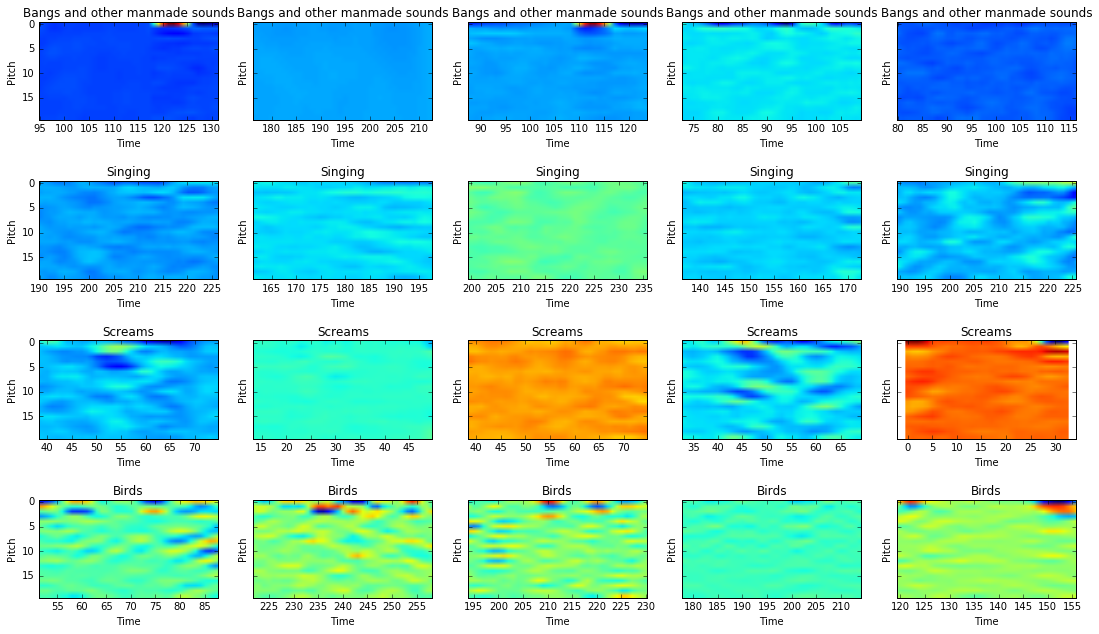

In [12]:
# Creates a 4x5 table of plots to show what (possibly the RATE of) change in MFCCs look like for different sound types

j = 0
num_plots = 5
fig,axes = plt.subplots(nrows=len(my_sounds),ncols=num_plots,sharey=True)
plt.subplots_adjust(left=0,right=2.4,top=2,bottom=0,hspace=0.62)
axes = axes.flatten()
for key in my_sounds: # get type of sound
    i = 1
    for index in np.random.choice(len(my_sounds[key]),size=num_plots,replace=False): # randomly select some from each
        my_mfcc = librosa.feature.mfcc(y=my_sounds[key][index][0], sr=my_sounds[key][index][1])
        delta_mfcc = librosa.feature.delta(my_mfcc)#,order=2)
        axes[j].set_title(key)
        axes[j].set_xlabel("Time")
        axes[j].set_ylabel("Pitch")
        axes[j].imshow(delta_mfcc)
        i += 1
        j += 1
        
axes.show()

In [13]:
from scipy.stats import gmean

AttributeError: 'numpy.ndarray' object has no attribute 'show'

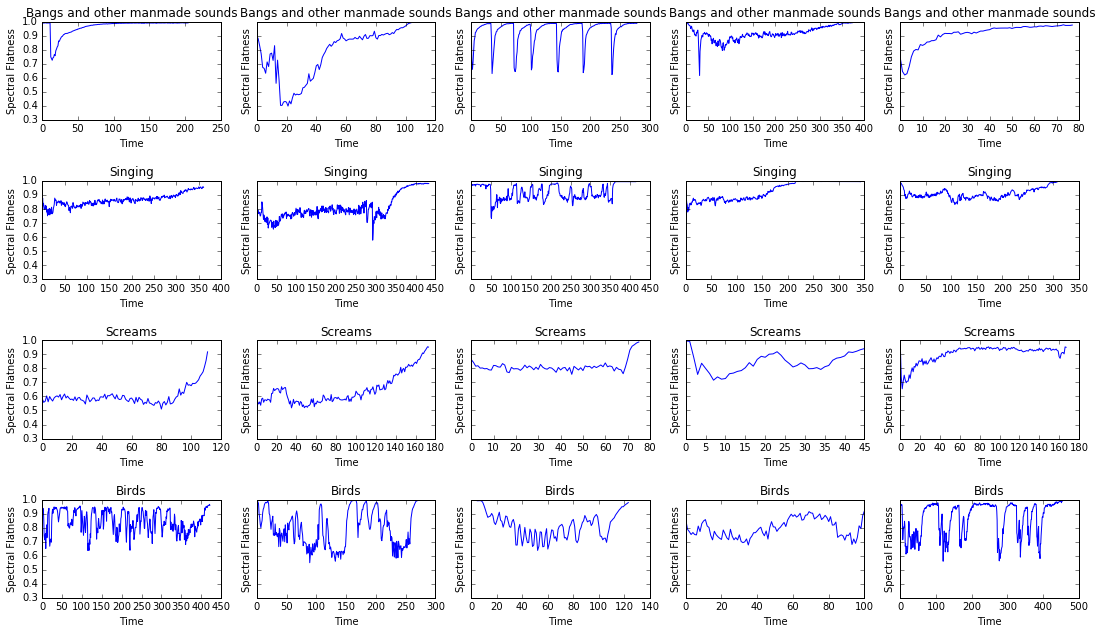

In [14]:
# Creates a 4x5 table of plots to show what spectral flatness look like for different sound types

window_size = 1024
hop_size = window_size / 2
j = 0
num_plots = 5
fig,axes = plt.subplots(nrows=len(my_sounds),ncols=num_plots,sharey=True)
plt.subplots_adjust(left=0,right=2.4,top=2,bottom=0,hspace=0.62)
axes = axes.flatten()
for key in my_sounds: # get type of sound
    i = 1
    for index in np.random.choice(len(my_sounds[key]),size=num_plots,replace=False): # randomly select some from each
        sgram,times,freqs = spectrogram(my_sounds[key][index][0],window_size,hop_size,my_sounds[key][index][1],display=False)
#         print(np.abs(sgram))
#         print(sgram[0])
        # have to take abs val to prevent NaNs (tries taking root of num < 0)
        geom_mean = [gmean(np.abs(row)) for row in sgram]
#         print(np.sometrue(np.isnan(geom_mean))) # gives false, so this does NOT return NaNs
#         print(gmean(sgram[0]))
        arith_mean = [np.mean(np.abs(row)) for row in sgram]
        spec_flatness = np.array(geom_mean) / np.array(arith_mean)
#         print(spec_flatness)
#         print(np.shape(sgram))
#         print(len(sgram[0]))
#         print(len(freqs))
        axes[j].set_title(key)
        axes[j].set_xlabel("Time")
        axes[j].set_ylabel("Spectral Flatness")
        axes[j].plot(np.arange(len(spec_flatness)),spec_flatness)
        i += 1
        j += 1
        
axes.show()

In [ ]:
%timeit(acorr(my_sounds[key][index][0]))

In [ ]:
# %timeit(np.correlate(my_sounds[key][index][0],my_sounds[key][index][0],mode='full'))
%timeit(librosa.core.autocorrelate(my_sounds[key][index][0],max_size=(3*len(my_sounds[key][index][0])/4)))

1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5


AttributeError: 'numpy.ndarray' object has no attribute 'show'

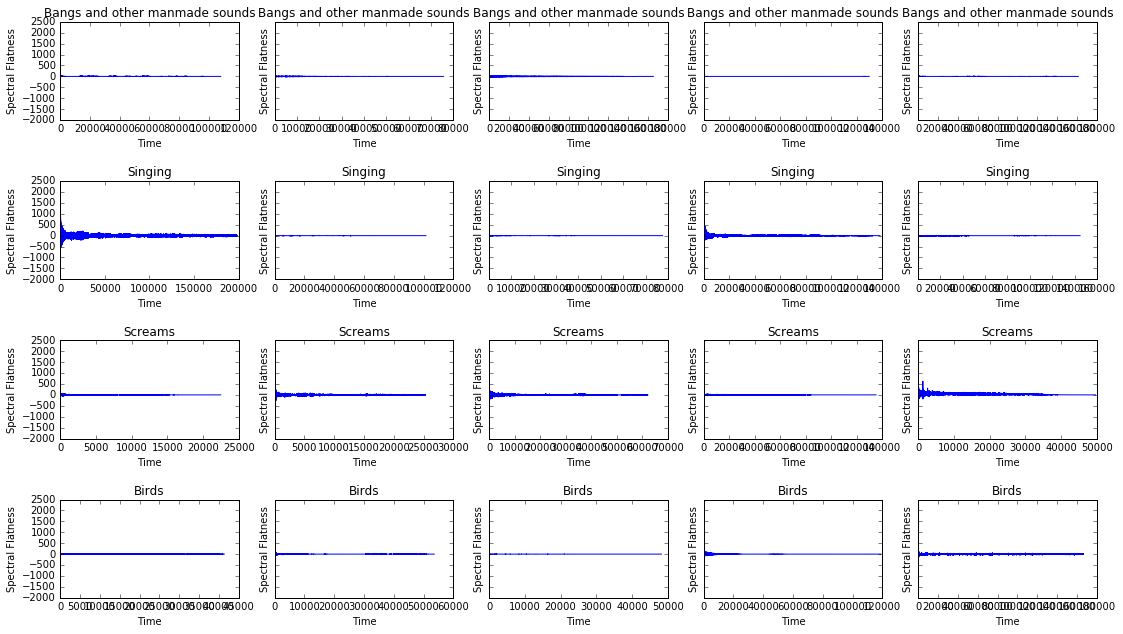

In [16]:
# Creates a 4x5 table of plots to show what autocorrelation look like for different sound types

window_size = 1024
hop_size = window_size / 2
j = 0
num_plots = 5
fig,axes = plt.subplots(nrows=len(my_sounds),ncols=num_plots,sharey=True)
plt.subplots_adjust(left=0,right=2.4,top=2,bottom=0,hspace=0.62)
axes = axes.flatten()
for key in my_sounds: # get type of sound
    i = 1
    for index in np.random.choice(len(my_sounds[key]),size=num_plots,replace=False): # randomly select some from each
#         lags,c,line_plot,b = plt.acorr(my_sounds[key][index][0])
        print(i)
        axes[j].set_title(key)
        axes[j].set_xlabel("Time")
        axes[j].set_ylabel("Spectral Flatness")
#         axes[j].acorr(my_sounds[key][index][0])
        axes[j].plot(librosa.core.autocorrelate(my_sounds[key][index][0],max_size=(3*len(my_sounds[key][index][0])/4)))
#         print(acorr(my_sounds[key][index][0]))
#         print(np.correlate(my_sounds[key][index][0],my_sounds[key][index][0]))
#         axes[j].plot(np.correlate(my_sounds[key][index][0][:-100],my_sounds[key][index][0][:-100]))
        i += 1
        j += 1
        
axes.show()

In [ ]:
# Stuff for trying to compress pickled file to make sure it was >100MB, so it could be uploaded to Github
# Doesn't succeed, just a few MB over 100MB.  I don't believe it's possible/practical with any built-in Python utilities

# import bz2,json,contextlib
# cPickle.dump(my_sounds,open("out.pkl","w"))
## data = bz2.compress(my_sounds,9)
# with contextlib.closing(bz2.BZ2File('data.json.bz2', 'wb')) as f:
#     cPickle.dump(my_sounds, f)
## with open("out.bz2","w") as outfile:
##     outfile.write(data)
##     bz2.compress(outfile,9)

In [ ]:
window_size = 1000
hop_size = window_size / 2
sgram,times,freqs = spectrogram(my_sounds["Singing"][0][0],window_size,hop_size,my_sounds["Singing"][0][1],display=False)
Audio(my_sounds["Singing"][0][0],rate=my_sounds["Singing"][0][1])
librosa.display.specshow(librosa.feature.delta(sgram))
# plt.pcolor(sgram)

In [4]:
# Some code provided to us for HW3 that we'll reuse

from scipy.fftpack import fft,dct,ifft
from scipy.signal import hann, fftconvolve, convolve

def wavwrite(filepath, data, sr, norm=True, dtype='int16',):
    '''
    Write wave file using scipy.io.wavefile.write, converting from a float (-1.0 : 1.0) numpy array to an integer array

    Parameters
    ----------
    filepath : str
        The path of the output .wav file
    data : np.array
        The float-type audio array
    sr : int
        The sampling rate
    norm : bool
        If True, normalize the audio to -1.0 to 1.0 before converting integer
    dtype : str
        The output type. Typically leave this at the default of 'int16'.
    '''
    if norm:
        data /= np.max(np.abs(data))
    data = data * np.iinfo(dtype).max
    data = data.astype(dtype)
    sp.io.wavfile.write(filepath, sr, data)

#-----------------------------------------------------------
# Here's an stft implementation. Yes, it doesn't bother to get the last little bit of audio
def stft(signal, window_size, hop_size, window_type = 'hann'):
    """
    Computes the short term fourier transform of a 1-D numpy array, where the array is windowed into a set of subarrays,
    each of length window_size. The distance between window centers (in samples) is given by hop_size. The type of
    window applied is determined by window_type. This returns a 2-D numpy array where the ith column is the FFT of the
    ith window. Each column contains an array of complex values.

    Input Parameters
    ----------------
    signal: The 1-d (complex or real) numpy array containing the signal
    window_size: an integer scalar specifying the number of samples in a window
    hop_size: an integer specifying the number of samples between the start of adjacent windows
    window_type: a string specifying one of two "hann" or "rectangular"

    Returns
    -------
    a 2D numpy array of complex numbers where the array column is the FFT of the ith window,
    and the jth element in the ith column is the jth frequency of analysis.
    """
    # figure out how many hops
    length_to_cover_with_hops = len(signal) - window_size;
    assert (length_to_cover_with_hops >= 0), "window_size cannot be longer than the signal to be windowed"
    num_hops = 1 + length_to_cover_with_hops/hop_size;

    # make our window function
    if window_type == 'hann':
        window = hann(window_size)
    elif window_type=='rectangular':
        window = np.ones(window_size)
    else:
        raise Exception('Invalid window type. Must be "hann" or "rectangular".')

    stft = [0]*num_hops
    # fill the array with values
    for hop in range(num_hops):
        start = hop*hop_size
        end = start + window_size
        unwindowed_sound = signal[start:end]
        windowed_sound =  unwindowed_sound * window
        stft[hop]= fft(windowed_sound, window_size)
    return np.array(stft)

#-----------------------------------------------------------
def spectrogram(signal, window_size, hop_size, sample_rate, window_type = 'hann', display = True):
    """
    Computes the short term fourier transform of a 1-D numpy array, where the array is windowed into a set of subarrays,
    each of length window_size. The distance between window centers (in samples) is given by hop_size. The type of
    window applied is determined by window_type. This creates a 2-D numpy array where the ith column is the FFT of the
    ith window. Each column contains an array of complex values.  It then creates a magnitude spectrogram of the signal
    and plots it on the screen.  Here, the vertical dimension is frequency (in Hz), the horizontal dimension is time
    (in seconds), brightness corresponds to amplitude (in dB). Only frequencies up to the Nyquist rate are displayed.

    Input Parameters
    ----------------
    signal: The 1-d (complex or real) numpy array containing the signal
    window_size: an integer scalar specifying the number of samples in a window
    hop_size: an integer specifying the number of samples between the start of adjacent windows
    sample_rate: an integer giving the sample rate of the input signal, in Hz
    window_type: a string specifying one of two "hann" or "rectangular"
    display: a bool. If set to True, it plots the spectrogram. Else it does not.

    Returns
    -------
    an output tuple with 3 items:

    sgram:  a 2-D numpy array of real-valued numbers that contains the magnitude spectrogram sgram[t,f] is the magnitude
            at time t and frequency f. This only contains values up to the nyquist frequency
    times: a 1-D numpy array of non-negative real-values that gives the times,  
           times[t] gives the start time of the tth window in seconds
    freqs: a 1-D numpy array  of non-negative real values. freqs[f] gives the fth
           frequency of analysis in Hz, up to the nyquist frequency

    Calling Example
    ---------------
    sgram,times,freqs = spectrogram(signal, window_size, hop_size, sample_rate )
    """
    # get the stft
    X = stft(signal, window_size, hop_size, window_type)

    # figure out what my window start times are
    times = np.arange(len(X))
    hop_in_secs = hop_size/(1.0 * sample_rate)
    times = times * hop_in_secs

    # chop off everything above the nyquist rate & rotate for display
    X = np.rot90(X,3)
    sgram = np.array(X[0:len(X)/2])

    # figure out what my frequencies of analysis are
    analysis_f0 = float(sample_rate)/window_size
    freqs = np.arange(len(sgram)) * analysis_f0

    # turn the complex values into magnitudes and put it into a log scale
    sgram = np.abs(sgram) + 0.00000000000001  # this prevents taking the log of 0
    log_sgram = 20 * np.log10(sgram)

    # plot the spectrum
    if display:
        plt.figure()
        x_coord = np.tile(times,(len(freqs),1))
        x_coord = np.fliplr(x_coord)
        y_coord = np.tile(freqs,(len(times),1))
        y_coord = np.rot90(y_coord,3)

        plt.pcolor(x_coord,y_coord,log_sgram)
        # set the limits of the plot to the limits of the data
        plt.axis([x_coord.min(), x_coord.max(), y_coord.min(), y_coord.max()])

        plt.title('Magnitude Spectrogram in dB')
        plt.xlabel('time in seconds')
        plt.ylabel('frequency in Hz')
        cbar = plt.colorbar()

    return np.rot90(log_sgram,1), times, freqs

size = np.size
concatenate = np.concatenate
zeros = np.zeros
absolute = np.abs
arange = np.arange
def acorr(x):
    """
    Takes a 1D numpy array and returns the autocorrelation. 

    Input Parameter:
    ----------------
    x: 1D numpy array of length Lx

    Ouput Parameter:
    ----------------
    x_acorr: 1D numpy array of length x_len containing the values of the autocorrelation function of x

    Note: the actual length of autocorrelation function is (2*x_len)-1, but since this function is symmetric
          we can cut off (x_len)-1 samples and return one side of length x_len without losing information.
    """
    x_len=size(x)
    x_pad=concatenate([x,zeros(x_len-1)])
    x_acorr=ifft(abs(fft(x_pad))**2).real
    x_acorr=x_acorr[0:x_len]

    x_acorr=x_acorr/(arange(x_len)[::-1]+1)  # normalize by the number of nonzero additions

    return x_acorr